In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
# Import modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

orders  = pd.read_csv("/Users/layzon//Documents/code/modulo_3/project final/data/olist_order_items_dataset.csv")

products = pd.read_csv("/Users/layzon//Documents/code/modulo_3/project final/data/olist_products_dataset.csv")


translations = pd.read_csv("/Users/layzon//Documents/code/modulo_3/project final/data/product_category_name_translation.csv")



In [4]:
#agregar clusters
cluster_1  = pd.read_csv("/Users/layzon/Documents/code/modulo_3/project/cluster_1.csv")
cluster_2  = pd.read_csv("/Users/layzon/Documents/code/modulo_3/project/cluster_2.csv")
cluster_3  = pd.read_csv("/Users/layzon/Documents/code/modulo_3/project/cluster_3.csv")
cluster_4  = pd.read_csv("/Users/layzon/Documents/code/modulo_3/project/cluster_4.csv")

In [5]:

orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [7]:

products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [7]:

translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:

translations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [9]:
# Translate product names to English.
products = products.merge(translations, on='product_category_name', how="left")


# Print English names.
products['product_category_name_english']

0                        perfumery
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object

In [10]:
dat = pd.merge(products, translations, on='product_category_name', how='inner')
dat

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english_x,product_category_name_english_y
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery,perfumery
...,...,...,...,...,...,...,...,...,...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery,furniture_mattress_and_upholstery


# Convert product IDs to product category names.**

In [11]:
# Merge 
orders = orders.merge(products[['product_id','product_category_name_english']], on='product_id', how='left')

# Print orders header.
orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [12]:
# Drop products without a defined category.
orders.dropna(inplace=True, subset=['product_category_name_english'])
# Print number of unique items.
len(orders['product_id'].unique())

32328

In [13]:
# Print number of unique categories.
len(orders['product_category_name_english'].unique())

71

#### transaccions

In [14]:
# Identify transactions associated with example order.
example1 = orders[orders['order_id'] == 'fe64170e936bc5f6a6a41def260984b9']

# Print example.
example1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
111984,fe64170e936bc5f6a6a41def260984b9,1,81b6c7c058add831803fcbba6dcc1df2,da8622b14eb17ae2831f4ac5b9dab84a,2018-05-04 17:30:27,99.9,18.02,bed_bath_table
111985,fe64170e936bc5f6a6a41def260984b9,2,78efe838c04bbc568be034082200ac20,0241d4d5d36f10f80c644447315af0bd,2018-05-04 17:30:27,99.9,15.54,furniture_decor


In [15]:
# Identify transactions associated with example order.
example2 = orders[orders['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']

# Print example.
example2

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19,watches_gifts
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19,watches_gifts
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19,watches_gifts
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19,watches_gifts


# Map orders to transactions.



In [16]:
# Recover transaction itemsets from orders DataFrame.
transactions = orders.groupby("order_id").product_id.unique()

# Print transactions header.
transactions.head()

order_id
00010242fe8c5a6d1ba2dd792cb16214    [4244733e06e7ecb4970a6e2683c13e61]
00018f77f2f0320c557190d7a144bdd3    [e5f2d52b802189ee658865ca93d83a8f]
000229ec398224ef6ca0657da4fc703e    [c777355d18b72b67abbeef9df44fd0fd]
00024acbcdf0a6daa1e931b038114c75    [7634da152a4610f1595efa32f14722fc]
00042b26cf59d7ce69dfabb4e55b4fd9    [ac6c3623068f30de03045865e4e10089]
Name: product_id, dtype: object

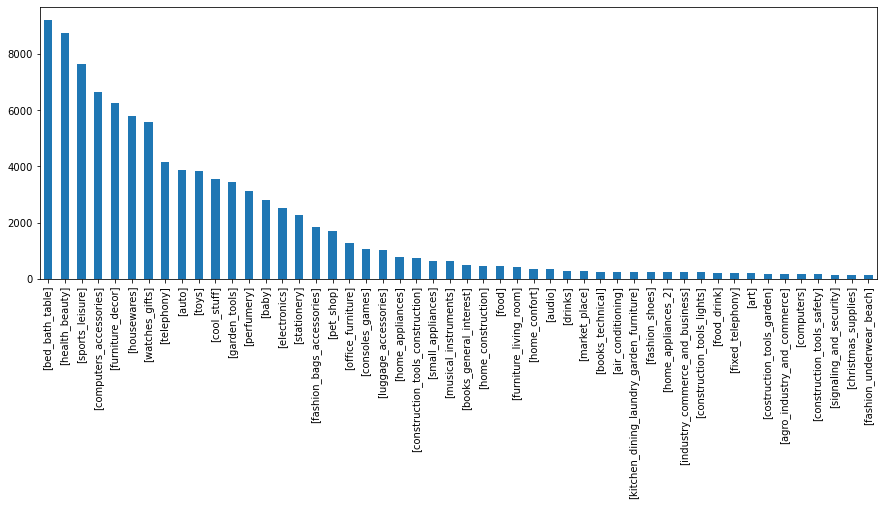

In [19]:
# Plot 50 largest categories of transactions.
transactions.value_counts()[:50].plot(kind='bar', figsize=(15,5))

In [17]:
# Convert the pandas series to list of lists.
transactions = transactions.tolist()

# Print length of transactions.
len(transactions)

97256

In [18]:
transactions

[array(['4244733e06e7ecb4970a6e2683c13e61'], dtype=object),
 array(['e5f2d52b802189ee658865ca93d83a8f'], dtype=object),
 array(['c777355d18b72b67abbeef9df44fd0fd'], dtype=object),
 array(['7634da152a4610f1595efa32f14722fc'], dtype=object),
 array(['ac6c3623068f30de03045865e4e10089'], dtype=object),
 array(['ef92defde845ab8450f9d70c526ef70f'], dtype=object),
 array(['8d4f2bb7e93e6710a28f34fa83ee7d28'], dtype=object),
 array(['557d850972a7d6f792fd18ae1400d9b6'], dtype=object),
 array(['310ae3c140ff94b03219ad0adc3c778f'], dtype=object),
 array(['4535b0e1091c278dfd193e5a1d63b39f'], dtype=object),
 array(['d63c1011f49d98b976c352955b1c4bea'], dtype=object),
 array(['f177554ea93259a5b282f24e33f65ab6'], dtype=object),
 array(['99a4788cb24856965c36a24e339b6058'], dtype=object),
 array(['368c6c730842d78016ad823897a372db'], dtype=object),
 array(['8cab8abac59158715e0d70a36c807415'], dtype=object),
 array(['3f27ac8e699df3d300ec4a5d8c5cf0b2'], dtype=object),
 array(['4fa33915031a8cde03dd0d3e8fb27f0

In [19]:
# Count number of unique item categories for each transaction.
counts = [len(transaction) for transaction in transactions]
# Print median number of items in a transaction.
np.median(counts)

1.0

In [20]:
# Print maximum number of items in a transaction.
np.max(counts)

8

# Association Rules and Metrics

In [53]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
onehot = encoder.fit(transactions).transform(transactions)

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
# Print header.
onehot.head()

,00066f42aeeb9f3007548bb9d3f33c38,00088930e925c41fd95ebfe695fd2655,0009406fd7479715e4bef61dd91f2462,000b8f95fcb9e0096488278317764d19,000d9be29b5207b54e86aa1b1ac54872,0011c512eb256aa0dbbb544d8dffcf6e,00126f27c813603687e6ce486d909d01,001795ec6f1b187d37335e1c4704762e,001b237c0e9bb435f2e54071129237e9,001b72dfd63e9833e8c02742adf472e3,...,ffedbd68fa6f44e788ff6c2db8094715,ffef256879dbadcab7e77950f4f4a195,fff0a542c3c62682f23305214eaeaa24,fff1059cd247279f3726b7696c66e44e,fff515ea94dbf35d54d256b3e39f0fea,fff6177642830a9a94a0f2cba5e476d1,fff81cc3158d2725c0655ab9ba0f712c,fff9553ac224cec9d15d49f5a263411f,fffdb2d0ec8d6a61f0a0a0db3f25b441,fffe9eeff12fcbd74a2f2b007dde0c58
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Compute the support metric


In [69]:
requent_itemsetss = fpgrowth(onehot, min_support=0.00001, use_colnames=True)
requent_itemsetss

,support,itemsets
0,0.000093,(4244733e06e7ecb4970a6e2683c13e61)
1,0.000010,(e5f2d52b802189ee658865ca93d83a8f)
2,0.000031,(c777355d18b72b67abbeef9df44fd0fd)
3,0.000021,(7634da152a4610f1595efa32f14722fc)
4,0.000123,(ac6c3623068f30de03045865e4e10089)
...,...,...
37981,0.000010,"(e5130ccb07bdb4424ec93754a54c917f, 5e7baae5961..."
37982,0.000010,"(e86b81dcac341ea01df0260077cdf082, 599dc392f7a..."
37983,0.000010,"(bd6e8cf9fe4122c385da2bcb9f979d5d, bd0ac51dc93..."
37984,0.000010,"(803f77475e1b51b47f1bfec4f2ec353f, bd0ac51dc93..."


In [81]:
requent_itemsetss = fpgrowth(onehot, min_support=0.0001, use_colnames=True)
requent_itemsetss

,support,itemsets
0,0.000123,(ac6c3623068f30de03045865e4e10089)
1,0.000524,(d63c1011f49d98b976c352955b1c4bea)
2,0.004802,(99a4788cb24856965c36a24e339b6058)
3,0.002992,(368c6c730842d78016ad823897a372db)
4,0.000195,(4fa33915031a8cde03dd0d3e8fb27f01)
...,...,...
1657,0.000123,"(3f14d740544f37ece8a9e7bc8349797e, 36f60d45225..."
1658,0.000113,"(422879e10f46682990de24d770e7f83d, 389d119b48c..."
1659,0.000298,"(35afc973633aaeb6b877ff57b2793310, 99a4788cb24..."
1660,0.000350,"(e53e557d5a159f5aa2c5e995dfdf244b, 36f60d45225..."


In [22]:
# Print support metric over all rows for each column.
onehot.mean(axis=0)

00066f42aeeb9f3007548bb9d3f33c38    0.000010
00088930e925c41fd95ebfe695fd2655    0.000010
0009406fd7479715e4bef61dd91f2462    0.000010
000b8f95fcb9e0096488278317764d19    0.000021
000d9be29b5207b54e86aa1b1ac54872    0.000010
                                      ...   
fff6177642830a9a94a0f2cba5e476d1    0.000021
fff81cc3158d2725c0655ab9ba0f712c    0.000010
fff9553ac224cec9d15d49f5a263411f    0.000010
fffdb2d0ec8d6a61f0a0a0db3f25b441    0.000051
fffe9eeff12fcbd74a2f2b007dde0c58    0.000010
Length: 32328, dtype: float64

# Compute the item count distribution over transactions

In [73]:
# Print distribution of item counts.
onehot.sum(axis=1).value_counts()

Series([], dtype: int64)

# Create a column for an itemset with multiple items


In [74]:
# Add sports_leisure and health_beauty to DataFrame.
onehot['sports_leisure_health_beauty'] = onehot['sports_leisure'] & onehot['health_beauty']

# Print support value.
onehot['sports_leisure_health_beauty'].mean(axis = 0)

KeyError: 'sports_leisure'

# **Aggregate the dataset further by combining product sub-categories**
We can use the inclusive OR operation to combine multiple categories.
* True | True = True
* True | False = True
* False | True = True
* False | False = False

In [41]:
# Merge books_imported and books_technical.
onehot['books'] = onehot['books_imported'] | onehot['books_technical']

# Print support values for books, books_imported, and books_technical.
onehot[['books','books_imported','books_technical']].mean(axis=0)

books              0.003218
books_imported     0.000545
books_technical    0.002673
dtype: float64

# Compute the confidence metric


In [42]:
# Compute joint support for sports_leisure and health_beauty.
joint_support = (onehot['sports_leisure'] & onehot['health_beauty']).mean()

# Print confidence metric for sports_leisure -> health_beauty.
joint_support / onehot['sports_leisure'].mean()

0.0018134715025906734

In [43]:
# Print confidence for health_beauty -> sports_leisure.
joint_support / onehot['sports_leisure'].mean()

0.0018134715025906734

# The Apriori Algorithm and Pruning

In [23]:
from mlxtend.frequent_patterns import apriori

# Apply apriori algorithm to data with min support threshold of 0.01.
frequent_itemsets = apriori(onehot, min_support = 0.01)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets


In [76]:
# Apply apriori algorithm to data with min support threshold of 0.001.
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.001337,(06edb72f1e0c64b14c5b79353f7abea3)
1,0.001049,(0a57f7d2c983bcf8188589a5fea4a8da)
2,0.001419,(0aabfb375647d9738ad0f7b4ea3653b1)
3,0.001028,(0bcc3eeca39e1064258aa1e932269894)
4,0.002766,(154e7e31ebfa092203795c972e5804a6)
5,0.001121,(165f86fe8b799a708a20ee4ba125c289)
6,0.001594,(19c91ef95d509ea33eda93495c4d3481)
7,0.001378,(2028bf1b01cafb2d2b1901fca4083222)
8,0.002663,(2b4609f8948be18874494203496bc318)
9,0.001604,(35afc973633aaeb6b877ff57b2793310)


In [30]:
# Apply apriori algorithm to data with min support threshold of 0.00005.
frequent_itemsets = apriori(onehot, min_support = 0.0008, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.001337,(06edb72f1e0c64b14c5b79353f7abea3)
1,0.000997,(08574b074924071f4e201e151b152b4e)
2,0.001049,(0a57f7d2c983bcf8188589a5fea4a8da)
3,0.001419,(0aabfb375647d9738ad0f7b4ea3653b1)
4,0.001028,(0bcc3eeca39e1064258aa1e932269894)
...,...,...
72,0.001193,(ec2d43cc59763ec91694573b31f1c29a)
73,0.000874,(ee0c1cf2fbeae95205b4aa506f1469f0)
74,0.000925,(ee406bf28024d97771c4b1e8b7e8e219)
75,0.001542,(f1c7f353075ce59d8a6f3cf58f419c9c)


In [50]:
# Apply apriori algorithm to data with a two-item limit.
frequent_itemsets = apriori(onehot, min_support = 0.0008, max_len = 2, use_colnames = True)


In [44]:
frequent_itemsets.support.min()

0.0008020070741136794

# Computing association rules from Apriori output**

In [82]:
from mlxtend.frequent_patterns import association_rules

# Recover association rules using support and a minimum threshold of 0.0001.
rules = association_rules(requent_itemsetss, metric = 'support', min_threshold = 0.0000001)

# Print rules header.
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3f14d740544f37ece8a9e7bc8349797e),(36f60d45225e60c7da4558b070ce4b60),0.000833,0.001141,0.000123,0.148148,129.804471,0.000122,1.172573
1,(36f60d45225e60c7da4558b070ce4b60),(3f14d740544f37ece8a9e7bc8349797e),0.001141,0.000833,0.000123,0.108108,129.804471,0.000122,1.120278
2,(422879e10f46682990de24d770e7f83d),(389d119b48cf3043d311335e499d9c6b),0.003619,0.003198,0.000113,0.031250,9.772508,0.000102,1.028957
3,(389d119b48cf3043d311335e499d9c6b),(422879e10f46682990de24d770e7f83d),0.003198,0.003619,0.000113,0.035370,9.772508,0.000102,1.032915
4,(35afc973633aaeb6b877ff57b2793310),(99a4788cb24856965c36a24e339b6058),0.001604,0.004802,0.000298,0.185897,38.714435,0.000290,1.222448


# Pruning association rules

In [83]:
# Recover association rules using confidence threshold of 0.01.
rules = association_rules(requent_itemsetss, metric = 'confidence', min_threshold = 0.01)

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3f14d740544f37ece8a9e7bc8349797e),(36f60d45225e60c7da4558b070ce4b60),0.000833,0.001141,0.000123,0.148148,129.804471,0.000122,1.172573
1,(36f60d45225e60c7da4558b070ce4b60),(3f14d740544f37ece8a9e7bc8349797e),0.001141,0.000833,0.000123,0.108108,129.804471,0.000122,1.120278
2,(422879e10f46682990de24d770e7f83d),(389d119b48cf3043d311335e499d9c6b),0.003619,0.003198,0.000113,0.031250,9.772508,0.000102,1.028957
3,(389d119b48cf3043d311335e499d9c6b),(422879e10f46682990de24d770e7f83d),0.003198,0.003619,0.000113,0.035370,9.772508,0.000102,1.032915
4,(35afc973633aaeb6b877ff57b2793310),(99a4788cb24856965c36a24e339b6058),0.001604,0.004802,0.000298,0.185897,38.714435,0.000290,1.222448
5,(99a4788cb24856965c36a24e339b6058),(35afc973633aaeb6b877ff57b2793310),0.004802,0.001604,0.000298,0.062099,38.714435,0.000290,1.064500
6,(e53e557d5a159f5aa2c5e995dfdf244b),(36f60d45225e60c7da4558b070ce4b60),0.001604,0.001141,0.000350,0.217949,190.962347,0.000348,1.277229
7,(36f60d45225e60c7da4558b070ce4b60),(e53e557d5a159f5aa2c5e995dfdf244b),0.001141,0.001604,0.000350,0.306306,190.962347,0.000348,1.439246
8,(4fcb3d9a5f4871e8362dfedbdb02b064),(f4f67ccaece962d013a4e1d7dc3a61f7),0.000915,0.000576,0.000175,0.191011,331.731942,0.000174,1.235399
9,(f4f67ccaece962d013a4e1d7dc3a61f7),(4fcb3d9a5f4871e8362dfedbdb02b064),0.000576,0.000915,0.000175,0.303571,331.731942,0.000174,1.434583


In [72]:
# Select rules with a consequent support above 0.095.
rules = rules[rules['consequent support'] > 0.095]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


# The leverage metric


In [85]:
# Select rules with leverage higher than 0.0.
rules = rules[rules['leverage'] > 0]

# Print rules.
rules
rules.to_csv('recom_system_by_products.csv', index=False)

# Visualizing patterns in metrics

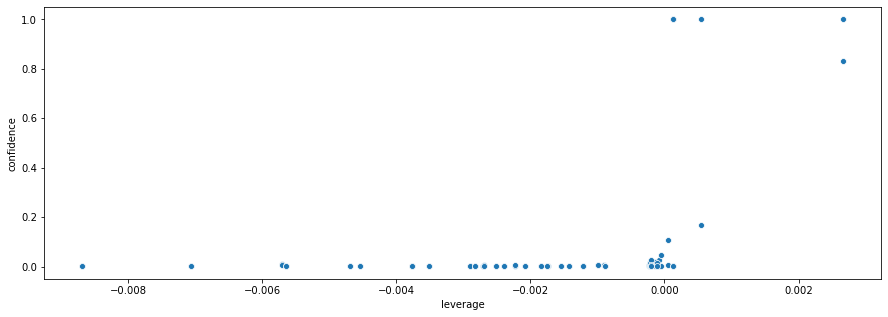

In [53]:
# Recover association rules with a minimum support greater than 0.000001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.000001)

# Plot leverage against confidence.
plt.figure(figsize=(15,5))
sns.scatterplot(x="leverage", y="confidence", data=rules)

In [90]:
rules["antecedents"] = rules.antecedents.astype("object")
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3f14d740544f37ece8a9e7bc8349797e),(36f60d45225e60c7da4558b070ce4b60),0.000833,0.001141,0.000123,0.148148,129.804471,0.000122,1.172573
1,(36f60d45225e60c7da4558b070ce4b60),(3f14d740544f37ece8a9e7bc8349797e),0.001141,0.000833,0.000123,0.108108,129.804471,0.000122,1.120278
2,(422879e10f46682990de24d770e7f83d),(389d119b48cf3043d311335e499d9c6b),0.003619,0.003198,0.000113,0.031250,9.772508,0.000102,1.028957
3,(389d119b48cf3043d311335e499d9c6b),(422879e10f46682990de24d770e7f83d),0.003198,0.003619,0.000113,0.035370,9.772508,0.000102,1.032915
4,(35afc973633aaeb6b877ff57b2793310),(99a4788cb24856965c36a24e339b6058),0.001604,0.004802,0.000298,0.185897,38.714435,0.000290,1.222448
5,(99a4788cb24856965c36a24e339b6058),(35afc973633aaeb6b877ff57b2793310),0.004802,0.001604,0.000298,0.062099,38.714435,0.000290,1.064500
6,(e53e557d5a159f5aa2c5e995dfdf244b),(36f60d45225e60c7da4558b070ce4b60),0.001604,0.001141,0.000350,0.217949,190.962347,0.000348,1.277229
7,(36f60d45225e60c7da4558b070ce4b60),(e53e557d5a159f5aa2c5e995dfdf244b),0.001141,0.001604,0.000350,0.306306,190.962347,0.000348,1.439246
8,(4fcb3d9a5f4871e8362dfedbdb02b064),(f4f67ccaece962d013a4e1d7dc3a61f7),0.000915,0.000576,0.000175,0.191011,331.731942,0.000174,1.235399
9,(f4f67ccaece962d013a4e1d7dc3a61f7),(4fcb3d9a5f4871e8362dfedbdb02b064),0.000576,0.000915,0.000175,0.303571,331.731942,0.000174,1.434583
